In [1]:
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

In [2]:
alpaca_api_key = "PKJYB527YAQVS4J907RJ"
alpaca_secret_key = "zb5bvTpu8cWaKIgAbDCESouV9MX0qn4RXiQzS5n8"

In [3]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Set ticker
tickers = ["AMC"]

In [5]:
# Set timeframe
timeframe = "1Day"

In [6]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2014-02-07", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-02-07", tz="America/New_York").isoformat()

In [7]:
# Get closing prices for stock from the last year
df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

def signal_creator_5(row):
    percent_diff = (row['close'] - row['shifted_close_5']) / row['shifted_close_5']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0
    
def signal_creator_15(row):
    percent_diff = (row['close'] - row['shifted_close_15']) / row['shifted_close_15']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

def signal_creator_30(row):
    percent_diff = (row['close'] - row['shifted_close_30']) / row['shifted_close_30']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

df = df.drop(columns=['symbol'])

# 5 day shift
df['shifted_close_5'] = df['close'].shift(periods=5)
df['signal_5'] = 0
print(df)
df['signal_5'] = df.apply(signal_creator_5, axis=1)

# 15 day shift
df['shifted_close_15'] = df['close'].shift(periods=15)
df['signal_15'] = 0
print(df)
df['signal_15'] = df.apply(signal_creator_15, axis=1)

# 30 day shift
df['shifted_close_30'] = df['close'].shift(periods=30)
df['signal_30'] = 0
df['signal_30'] = df.apply(signal_creator_30, axis=1)

# Columns and NA drops to prevent data leakege
df.dropna(inplace=True)
df.drop(columns=['shifted_close_5','shifted_close_15','shifted_close_30'],inplace=True)

# Display sample data
df.tail(10)



                           close     high     low  trade_count   open  \
timestamp                                                               
2016-01-04 05:00:00+00:00  23.17  23.7600  22.680         4160  23.50   
2016-01-05 05:00:00+00:00  23.44  23.8200  23.010         4139  23.25   
2016-01-06 05:00:00+00:00  23.20  23.8600  23.030         2371  23.03   
2016-01-07 05:00:00+00:00  22.62  23.0702  22.450         3868  22.71   
2016-01-08 05:00:00+00:00  22.38  22.9800  22.300         2977  22.75   
...                          ...      ...     ...          ...    ...   
2020-02-03 05:00:00+00:00   6.45   6.5900   6.410         5856   6.50   
2020-02-04 05:00:00+00:00   6.65   6.6900   6.385         8681   6.47   
2020-02-05 05:00:00+00:00   7.00   7.0950   6.690         9427   6.72   
2020-02-06 05:00:00+00:00   6.75   7.1300   6.730        11363   7.03   
2020-02-07 05:00:00+00:00   6.55   6.7500   6.540         9421   6.70   

                            volume       vwap  shi

,close,high,low,trade_count,open,volume,vwap,signal_5,signal_15,signal_30
timestamp,,,,,,,,,,
2020-01-27 05:00:00+00:00,6.36,6.535,6.250,11659,6.51,3223208,6.396196,-1,-1,-1
2020-01-28 05:00:00+00:00,6.79,6.800,6.290,10154,6.35,2148000,6.570835,-1,-1,-1
2020-01-29 05:00:00+00:00,6.77,6.890,6.690,7216,6.86,1488186,6.769993,0,-1,-1
2020-01-30 05:00:00+00:00,6.84,6.880,6.460,7588,6.62,1707738,6.719761,0,1,-1
2020-01-31 05:00:00+00:00,6.52,6.870,6.500,7830,6.81,1981760,6.578489,-1,0,-1
2020-02-03 05:00:00+00:00,6.45,6.590,6.410,5856,6.50,1494605,6.481503,0,0,-1
2020-02-04 05:00:00+00:00,6.65,6.690,6.385,8681,6.47,2060042,6.597264,0,0,-1
2020-02-05 05:00:00+00:00,7.00,7.095,6.690,9427,6.72,2207431,6.948472,1,0,-1
2020-02-06 05:00:00+00:00,6.75,7.130,6.730,11363,7.03,2801379,6.910169,0,-1,-1


In [8]:
# Use adjusted close prices to predict future

df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

data = df['close'].values.reshape(-1, 1)

In [9]:
# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [10]:
def prepare_data(data, n_steps, n_days):
    X, y = [], []
    for i in range(len(data) - n_steps - n_days):
        X.append(data[i : i + n_steps, 0])
        y.append(data[i + n_steps : i + n_steps + n_days, 0])
    return np.array(X), np.array(y)

# Update for 5 days model
n_steps_5 = 5
n_days_5 = 5

# Define and compile the model for 5 day prediction
model_5 = Sequential()
model_5.add(Dense(units=64, activation='relu', input_dim=n_steps_5))
model_5.add(Dense(units=n_days_5, activation='linear'))
model_5.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Prepare the data for 5 day prediction
X_5, y_5 = prepare_data(data_scaled, n_steps_5, n_days_5)

# Fit the model for 5-day prediction
model_5.fit(X_5, y_5, epochs=50, verbose=1)

# Update for 10 days model
n_steps_10 = 10
n_days_10 = 10 

# Define and compile the model for 10 day prediction
model_10 = Sequential()
model_10.add(Dense(units=64, activation='relu', input_dim=n_steps_10))
model_10.add(Dense(units=n_days_10, activation='linear'))
model_10.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Prepare the data for 10 day prediction
X_10, y_10 = prepare_data(data_scaled, n_steps_10, n_days_10)

# Fit the model for 10 day prediction
model_10.fit(X_10, y_10, epochs=50, verbose=1)

# Update for 30 days model
n_steps_30 = 30
n_days_30 = 30 

# Define and compile the model for 30 day prediction
model_30 = Sequential()
model_30.add(Dense(units=64, activation='relu', input_dim=n_steps_30))
model_30.add(Dense(units=n_days_30, activation='linear'))
model_30.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Prepare the data for 30 day prediction
X_30, y_30 = prepare_data(data_scaled, n_steps_30, n_days_30)

# Fit the model for 30 day prediction
model_30.fit(X_30, y_30, epochs=50, verbose=1)


Epoch 1/50

32/32 [==============================] - 1s 2ms/step - loss: 0.4952
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0614
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 4/50
32/32 [==============================] - 0s 968us/step - loss: 0.0174
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0170
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0167
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0165
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 11/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0157
Epoch 12/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 13/50
32/32 [==========================

In [11]:
# Prepare and reshape data

# Define parameters for each model
n_steps_5 = 5
n_days_5 = 5

n_steps_10 = 10
n_days_10 = 10

n_steps_30 = 30
n_days_30 = 30

# Prepare and reshape data for 5 day model
X_test_5, _ = prepare_data(data_scaled, n_steps_5, n_days_5)
X_test_5 = X_test_5.reshape((X_test_5.shape[0], X_test_5.shape[1], 1))

# Prepare and reshape data for 10 day model
X_test_10, _ = prepare_data(data_scaled, n_steps_10, n_days_10)
X_test_10 = X_test_10.reshape((X_test_10.shape[0], X_test_10.shape[1], 1))

# Prepare and reshape data for 30 day model
X_test_30, _ = prepare_data(data_scaled, n_steps_30, n_days_30)
X_test_30 = X_test_30.reshape((X_test_30.shape[0], X_test_30.shape[1], 1))

# Generate predictions
predictions_5 = model_5.predict(X_test_5)
predictions_10 = model_10.predict(X_test_10)
predictions_30 = model_30.predict(X_test_30)

# Inverse transform the scaled predictions for stock prices
predictions_5 = scaler.inverse_transform(predictions_5)
predictions_10 = scaler.inverse_transform(predictions_10)
predictions_30 = scaler.inverse_transform(predictions_30)

31/31 [==============================] - 0s 870us/step


Predicted Prices for the Next 5 Days:
[[22.19347   22.41976   22.254713  22.425058  22.358686 ]
 [21.985283  22.065817  21.916258  22.099886  22.127256 ]
 [22.086943  22.05378   21.967684  22.093096  22.156977 ]
 ...
 [ 6.27319    6.4046273  6.2694297  6.4603467  6.1820636]
 [ 6.404615   6.5396667  6.2961993  6.5322175  6.360597 ]
 [ 6.368588   6.547253   6.380141   6.5884805  6.399465 ]]


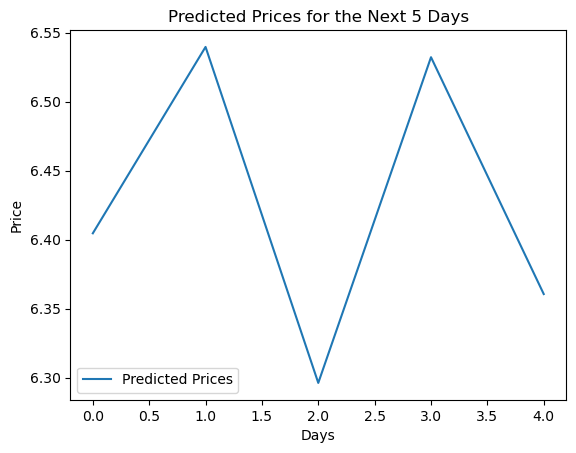

In [12]:
# Set title and data
print("Predicted Prices for the Next 5 Days:")
print(predictions_5)

# Plot
plt.plot(predictions_5[1020], label="Predicted Prices")
plt.title("Predicted Prices for the Next 5 Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Predicted Prices for the Next 10 Days:
[[21.072763  20.677776  20.832497  ... 20.584862  20.737362  20.639294 ]
 [20.653303  20.450912  20.453428  ... 20.205948  20.236506  20.067377 ]
 [20.298803  20.186773  20.046452  ... 19.830969  19.725397  19.447723 ]
 ...
 [ 6.6743026  6.433249   6.9802976 ...  6.6324124  6.802876   6.6726327]
 [ 6.622295   6.2949004  6.973206  ...  6.6022153  6.7494187  6.557754 ]
 [ 6.5000176  6.125955   6.799831  ...  6.4528155  6.617248   6.3207803]]


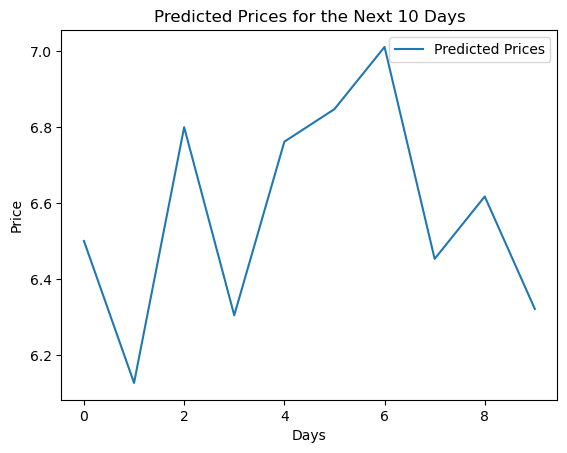

In [13]:
# Set title and data
print("Predicted Prices for the Next 10 Days:")
print(predictions_10)

# Plot
plt.plot(predictions_10[1011], label="Predicted Prices")
plt.title("Predicted Prices for the Next 10 Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Predicted Prices for the Next 30 Days:
[[21.063465  21.171978  20.15      ... 18.778938  19.714365  19.425747 ]
 [21.275051  21.310753  20.804647  ... 19.213863  18.924812  19.063406 ]
 [21.83384   21.196926  21.441774  ... 19.940367  19.73614   18.808258 ]
 ...
 [ 7.6078963  7.1616263  7.5308566 ...  6.9424195  6.5521874  6.786773 ]
 [ 7.490422   7.1785455  7.5950084 ...  7.006018   6.391604   6.6957107]
 [ 7.1809316  7.0056367  7.118134  ...  6.523934   6.1079     6.3268666]]


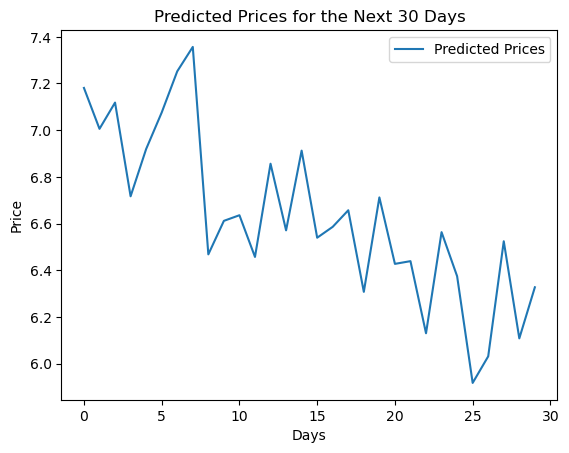

In [14]:
# Set title and data
print("Predicted Prices for the Next 30 Days:")
print(predictions_30)

# Plot
plt.plot(predictions_30[971], label="Predicted Prices")
plt.title("Predicted Prices for the Next 30 Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [15]:
# Create Signal Caller for 5 day

predictions_5 = scaler.inverse_transform(predictions_5.reshape(-1, 1)).flatten()

threshold = 0.02  

if predictions_5[1020] > (1 + threshold) * data[-1, 0]:
    signal = "Buy"
elif predictions_5[1020] < (1 - threshold) * data[-1, 0]:
    signal = "Sell"
else:
    signal = "Hold"

print("Signal:", signal)

Signal: Buy


In [16]:
# Create Signal Caller for 10 day

predictions_10 = scaler.inverse_transform(predictions_10.reshape(-1, 1)).flatten()

threshold = 0.02  

if predictions_10[1011] > (1 + threshold) * data[-1, 0]:
    signal = "Buy"
elif predictions_10[1011] < (1 - threshold) * data[-1, 0]:
    signal = "Sell"
else:
    signal = "Hold"

print("Signal:", signal)

Signal: Buy


In [17]:
# Create Signal Caller for 30 day

predictions_30 = scaler.inverse_transform(predictions_30.reshape(-1, 1)).flatten()

threshold = 0.02  

if predictions_30[972] > (1 + threshold) * data[-1, 0]:
    signal = "Buy"
elif predictions_30[972] < (1 - threshold) * data[-1, 0]:
    signal = "Sell"
else:
    signal = "Hold"

print("Signal:", signal)

Signal: Buy
